In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
%matplotlib inline

# Read Train Data

In [439]:
train_df=pd.read_csv("/kaggle/input/kaggle-compettion/train.csv")

In [440]:
train_df.head()

,Unnamed: 0,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
0,295,94DKEP,2750102,1905204,1010,5919,COMPLETED,5.0,"1905204,",0,44.0,NaN,1,89
1,923,94FTOJ,703684,2707623,2041,12440,CANCELED,NaN,"2208853,5697379,6530412,6986550,831898,297069,...",0,NaN,703684.0,1,163
2,3254,94CP5P,2292525,1428994,634,3173,COMPLETED,NaN,"7215059,1428994,",0,6.0,NaN,1,58
3,1096,94D4G1,7585415,6412601,1279,7961,CANCELED,NaN,"7709276,523565,6412601,",0,NaN,7585415.0,1,112
4,1817,94EC6Q,1049024,6812604,1085,4242,CANCELED,NaN,"1474009,6573666,353014,6124924,2301057,371675,...",0,NaN,1049024.0,1,72


# Read Test Data

In [441]:
test_df=pd.read_csv("/kaggle/input/kaggle-compettion/test.csv")

In [442]:
test_df.head()

,Unnamed: 0,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type
0,431,94BARA,221768,6379648,874,3513,COMPLETED,5.0,"438390,360585,6379648,",0,41.0,NaN,2
1,2543,94FTCI,7168674,2824024,1467,8030,CANCELED,NaN,"1313403,4365054,7280851,7306862,7414872,670241...",0,NaN,7168674.0,1
2,1187,94F9K2,7625087,3849380,1176,8349,CANCELED,NaN,"2043830,3849380,",0,NaN,7625087.0,1
3,747,94EANM,207440,5255827,1268,7681,CANCELED,NaN,"5653077,5255827,",0,NaN,207440.0,1
4,2542,94FM5A,3855518,403288,1382,8217,CANCELED,NaN,"1147040,403288,",0,NaN,3855518.0,1


# Data Shape

In [443]:
train_df.shape

(3559, 14)

In [444]:
test_df.shape

(1526, 13)

# Data Columns

In [445]:
train_df.columns

Index(['Unnamed: 0', 'hashed_id', 'rider_id', 'driver_id',
       'estimated_ride_duration', 'estimated_ride_distance', 'status',
       'rating', 'drivers_tried', 'review_requested', 'discount',
       'canceled_by', 'payment_type', 'estimated_fare'],
      dtype='object')

In [446]:
test_df.columns

Index(['Unnamed: 0', 'hashed_id', 'rider_id', 'driver_id',
       'estimated_ride_duration', 'estimated_ride_distance', 'status',
       'rating', 'drivers_tried', 'review_requested', 'discount',
       'canceled_by', 'payment_type'],
      dtype='object')

# Check Null Values

In [447]:
print(train_df.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Unnamed: 0  hashed_id  rider_id  driver_id  estimated_ride_duration  \
0          False      False     False      False                    False   
1          False      False     False      False                    False   
2          False      False     False      False                    False   
3          False      False     False      False                    False   
4          False      False     False      False                    False   
...          ...        ...       ...        ...                      ...   
3554       False      False     False      False                    False   
3555       False      False     False      False                    False   
3556       False      False     False      False                    False   
3557       False      False     False      False                    False   
3558       False      False     False      False                    False   

      estimat

In [448]:
print(test_df.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Unnamed: 0  hashed_id  rider_id  driver_id  estimated_ride_duration  \
0          False      False     False      False                    False   
1          False      False     False      False                    False   
2          False      False     False      False                    False   
3          False      False     False      False                    False   
4          False      False     False      False                    False   
...          ...        ...       ...        ...                      ...   
1521       False      False     False      False                    False   
1522       False      False     False      False                    False   
1523       False      False     False      False                    False   
1524       False      False     False      False                    False   
1525       False      False     False      False                    False   

      estimat

# Drop Unwanted  Columns

In [449]:
train_df.drop(["hashed_id","rider_id","driver_id","Unnamed: 0"],axis=1,inplace=True)

In [450]:
test_df.drop(["hashed_id","rider_id","driver_id","Unnamed: 0"],axis=1,inplace=True)

In [451]:
train_df.head()

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
0,1010,5919,COMPLETED,5.0,"1905204,",0,44.0,NaN,1,89
1,2041,12440,CANCELED,NaN,"2208853,5697379,6530412,6986550,831898,297069,...",0,NaN,703684.0,1,163
2,634,3173,COMPLETED,NaN,"7215059,1428994,",0,6.0,NaN,1,58
3,1279,7961,CANCELED,NaN,"7709276,523565,6412601,",0,NaN,7585415.0,1,112
4,1085,4242,CANCELED,NaN,"1474009,6573666,353014,6124924,2301057,371675,...",0,NaN,1049024.0,1,72


In [452]:
test_df.head()

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type
0,874,3513,COMPLETED,5.0,"438390,360585,6379648,",0,41.0,NaN,2
1,1467,8030,CANCELED,NaN,"1313403,4365054,7280851,7306862,7414872,670241...",0,NaN,7168674.0,1
2,1176,8349,CANCELED,NaN,"2043830,3849380,",0,NaN,7625087.0,1
3,1268,7681,CANCELED,NaN,"5653077,5255827,",0,NaN,207440.0,1
4,1382,8217,CANCELED,NaN,"1147040,403288,",0,NaN,3855518.0,1


# Data PreProcess And CLeaning

* CANCELED==0

* COMPLETED==1

In [453]:
train_df['status'].replace({'CANCELED': 0, 'COMPLETED': 1}, inplace=True)
train_df.head()

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
0,1010,5919,1,5.0,"1905204,",0,44.0,NaN,1,89
1,2041,12440,0,NaN,"2208853,5697379,6530412,6986550,831898,297069,...",0,NaN,703684.0,1,163
2,634,3173,1,NaN,"7215059,1428994,",0,6.0,NaN,1,58
3,1279,7961,0,NaN,"7709276,523565,6412601,",0,NaN,7585415.0,1,112
4,1085,4242,0,NaN,"1474009,6573666,353014,6124924,2301057,371675,...",0,NaN,1049024.0,1,72


In [454]:
test_df['status'].replace({'CANCELED': 0, 'COMPLETED': 1}, inplace=True)
test_df.head()

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type
0,874,3513,1,5.0,"438390,360585,6379648,",0,41.0,NaN,2
1,1467,8030,0,NaN,"1313403,4365054,7280851,7306862,7414872,670241...",0,NaN,7168674.0,1
2,1176,8349,0,NaN,"2043830,3849380,",0,NaN,7625087.0,1
3,1268,7681,0,NaN,"5653077,5255827,",0,NaN,207440.0,1
4,1382,8217,0,NaN,"1147040,403288,",0,NaN,3855518.0,1


In [455]:
# train_df.fillna(method='bfill', inplace=True)
train_df.fillna(0, inplace=True)
train_df["drivers_tried"] = train_df["drivers_tried"].apply(lambda x: len(str(x).split(',')) if isinstance(x, str) else 0)
train_df.head()



,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
0,1010,5919,1,5.0,2,0,44.0,0.0,1,89
1,2041,12440,0,0.0,9,0,0.0,703684.0,1,163
2,634,3173,1,0.0,3,0,6.0,0.0,1,58
3,1279,7961,0,0.0,4,0,0.0,7585415.0,1,112
4,1085,4242,0,0.0,8,0,0.0,1049024.0,1,72


In [456]:
test_df.fillna(0, inplace=True)
test_df["drivers_tried"] = test_df["drivers_tried"].apply(lambda x: len(str(x).split(',')) if isinstance(x, str) else 0)

test_df.head()

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type
0,874,3513,1,5.0,4,0,41.0,0.0,2
1,1467,8030,0,0.0,8,0,0.0,7168674.0,1
2,1176,8349,0,0.0,3,0,0.0,7625087.0,1
3,1268,7681,0,0.0,3,0,0.0,207440.0,1
4,1382,8217,0,0.0,3,0,0.0,3855518.0,1


In [457]:
train_df.describe()

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
count,3559.000000,3559.000000,3559.000000,3559.000000,3559.000000,3559.000000,3559.000000,3.559000e+03,3559.000000,3559.000000
mean,1251.835347,7504.365271,0.474852,1.439449,3.875808,0.005339,13.275920,8.497792e+05,1.015454,125.894352
std,478.069248,3910.272140,0.499437,2.215657,2.481359,0.072881,18.825409,1.967757e+06,0.123366,50.649609
min,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,30.000000
25%,906.000000,4820.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000e+00,1.000000,90.000000
50%,1194.000000,6910.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000e+00,1.000000,120.000000
75%,1508.000000,9326.500000,1.000000,5.000000,5.000000,0.000000,18.000000,1.695600e+05,1.000000,154.000000
max,4166.000000,36815.000000,1.000000,5.000000,17.000000,1.000000,88.000000,7.816947e+06,2.000000,665.000000


# Correlation Matrix

In [458]:
corr=train_df.corr()
corr.style.background_gradient(cmap = 'cool') 

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
estimated_ride_duration,1.000000,0.952806,0.048411,-0.013926,-0.172395,0.005656,0.104762,-0.053524,-0.032157,0.884162
estimated_ride_distance,0.952806,1.000000,0.043588,-0.018004,-0.170218,0.007039,0.098954,-0.035118,-0.036573,0.915385
status,0.048411,0.043588,1.000000,0.683308,-0.172840,0.077044,0.741724,-0.410709,0.131753,-0.038548
rating,-0.013926,-0.018004,0.683308,1.000000,-0.106218,0.074234,0.588138,-0.280641,0.138638,-0.063896
drivers_tried,-0.172395,-0.170218,-0.172840,-0.106218,1.000000,-0.019645,-0.112435,0.098812,0.009944,-0.144144
review_requested,0.005656,0.007039,0.077044,0.074234,-0.019645,1.000000,0.008144,-0.031643,0.022081,-0.003502
discount,0.104762,0.098954,0.741724,0.588138,-0.112435,0.008144,1.000000,-0.304633,0.122692,0.069408
canceled_by,-0.053524,-0.035118,-0.410709,-0.280641,0.098812,-0.031643,-0.304633,1.000000,-0.054112,-0.042723
payment_type,-0.032157,-0.036573,0.131753,0.138638,0.009944,0.022081,0.122692,-0.054112,1.000000,-0.033474
estimated_fare,0.884162,0.915385,-0.038548,-0.063896,-0.144144,-0.003502,0.069408,-0.042723,-0.033474,1.000000


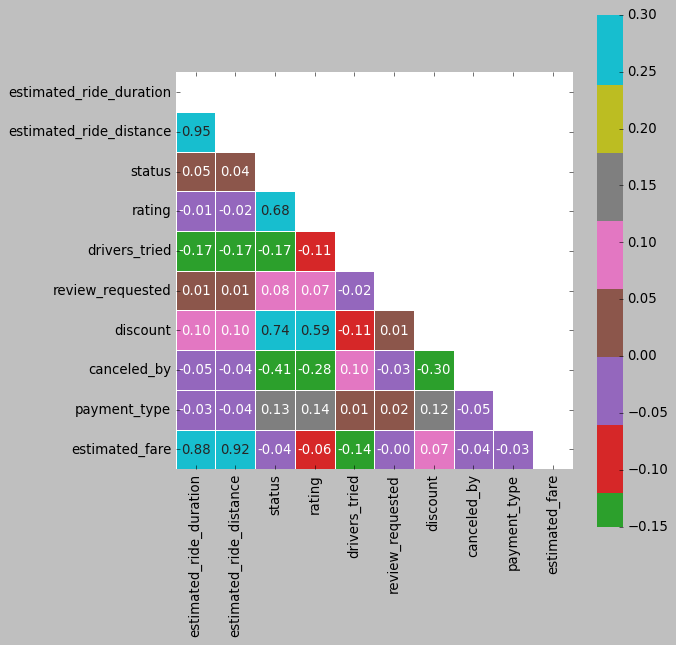

In [459]:
plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,
            annot=True, center=0,
            linewidths=.5, square=True,
            vmin=-0.15, vmax=0.3, fmt='0.2f',cmap="tab10")
plt.show()


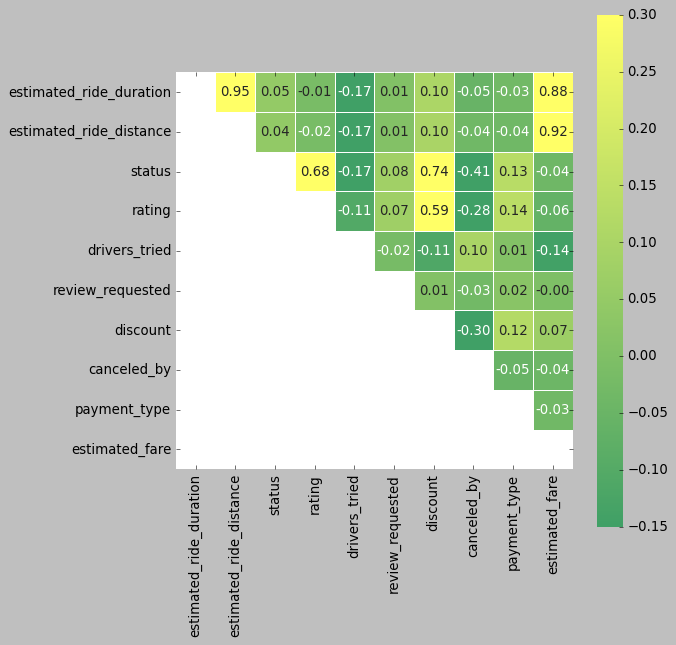

In [460]:
plt.figure(figsize=(8,8))
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,
            annot=True, center=0,
            linewidths=.5, square=True,
            vmin=-0.15, vmax=0.3, fmt='0.2f',cmap="summer")
plt.show()

# Data Analysis AnD Visualizations

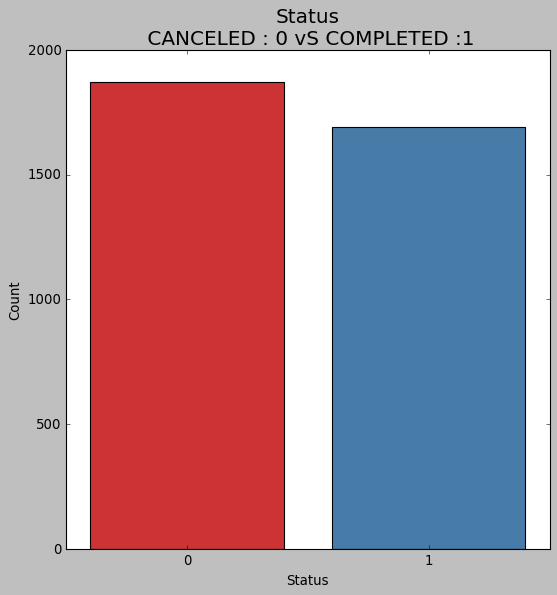

In [461]:
plt.figure(figsize=(7.8,7.8))
plt.style.use("classic")
sns.countplot(x="status",data=train_df,palette="Set1")
plt.title("Status\n CANCELED : 0 vS COMPLETED :1",color="black",fontsize=18)
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

# Scatter Plot of Estimated Fare vs Discount

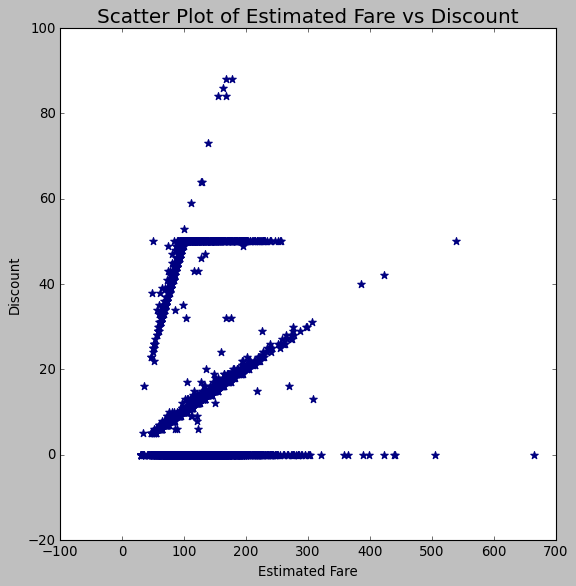

In [462]:
plt.figure(figsize=(8,8))
x=train_df["estimated_fare"]
y=train_df["discount"]
my_color=["green","red"]
plt.scatter(x,y,s=50,color="navy",marker="*")
plt.xlabel("Estimated Fare")
plt.ylabel("Discount")
plt.title("Scatter Plot of Estimated Fare vs Discount",color="black",fontsize=18)
plt.show()


# Scatter Plot of Estimated Ride Duration vs Estimated Fare

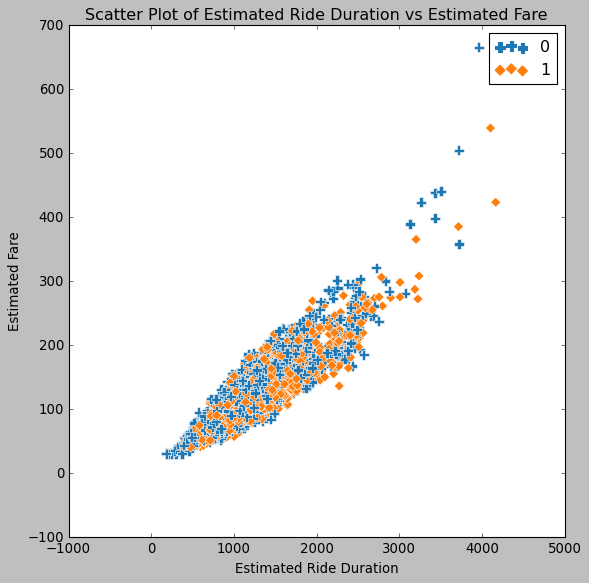

In [463]:
plt.figure(figsize=(8,8))
my_markers = {0: "P",1: "D"}
sns.scatterplot(x="estimated_ride_duration",y="estimated_fare",data=train_df,markers=my_markers,sizes=(40,80),
                hue="status",size="status",style="status",palette="tab10")
plt.xlabel("Estimated Ride Duration")
plt.ylabel("Estimated Fare")
plt.title("Scatter Plot of Estimated Ride Duration vs Estimated Fare")
plt.legend()
plt.show()

# Scatter Plot of Estimated Ride Distance vs Estimated Fare

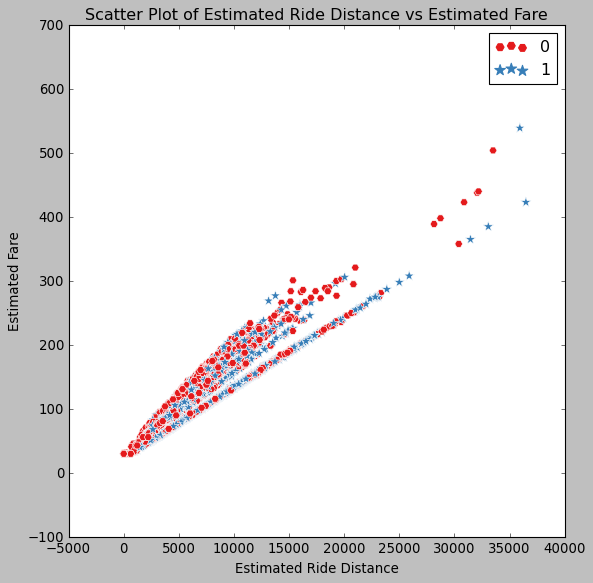

In [464]:
plt.figure(figsize=(8,8))
my_markers = {0: "H",1: "*"}
sns.scatterplot(x="estimated_ride_distance",y="estimated_fare",data=train_df,markers=my_markers,sizes=(100,50),
                hue="status",size="status",style="status",palette="Set1")
plt.xlabel("Estimated Ride Distance")
plt.ylabel("Estimated Fare")
plt.title("Scatter Plot of Estimated Ride Distance vs Estimated Fare")
plt.legend()
plt.show()

# Scatter Plot of Estimated Ride Distance vs Rating

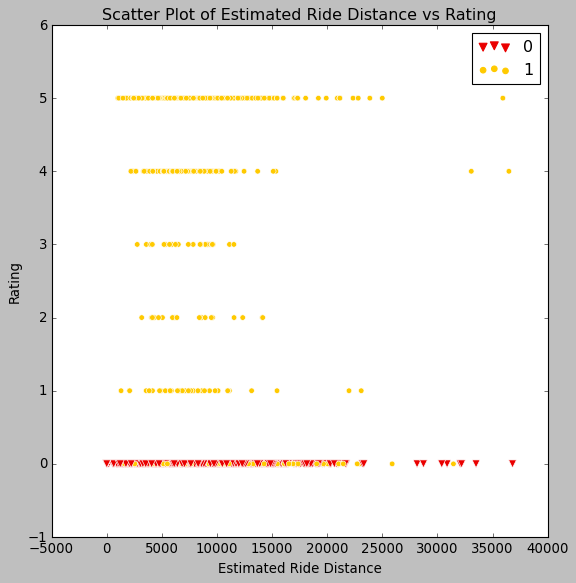

In [465]:
plt.figure(figsize=(8,8))

my_markers = {0: "v", 1: "."}
sns.scatterplot(x="estimated_ride_distance", y="rating", data=train_df, markers=my_markers, sizes=(100,50),
                hue="status", size="status", style="status", palette="hot")

plt.xlabel("Estimated Ride Distance")
plt.ylabel("Rating")
plt.title("Scatter Plot of Estimated Ride Distance vs Rating")
plt.legend()
plt.show()


# Scatter Plot of Estimated Ride Duration vs Rating

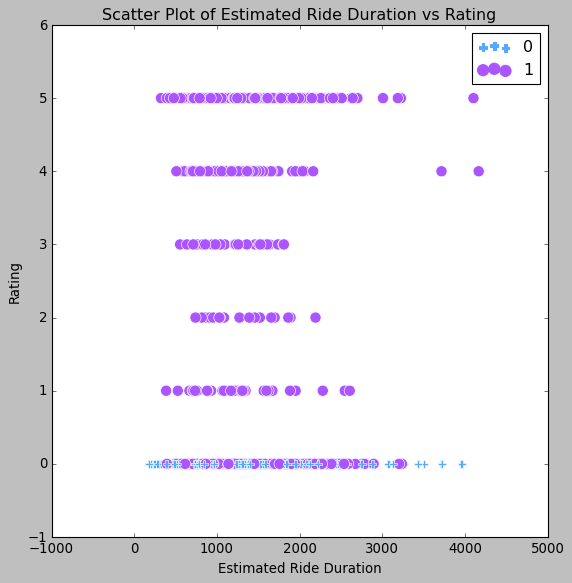

In [466]:
plt.figure(figsize=(8,8))

my_markers = {0: "P", 1: "o"}
sns.scatterplot(x="estimated_ride_duration", y="rating", data=train_df, markers=my_markers, sizes=(100,50),
                hue="status", size="status", style="status", palette="cool")

plt.xlabel("Estimated Ride Duration")
plt.ylabel("Rating")
plt.title("Scatter Plot of Estimated Ride Duration vs Rating")
plt.legend()
plt.show()


# Scatter Plot of Estimated Ride Duration vs Estimated Ride Distance

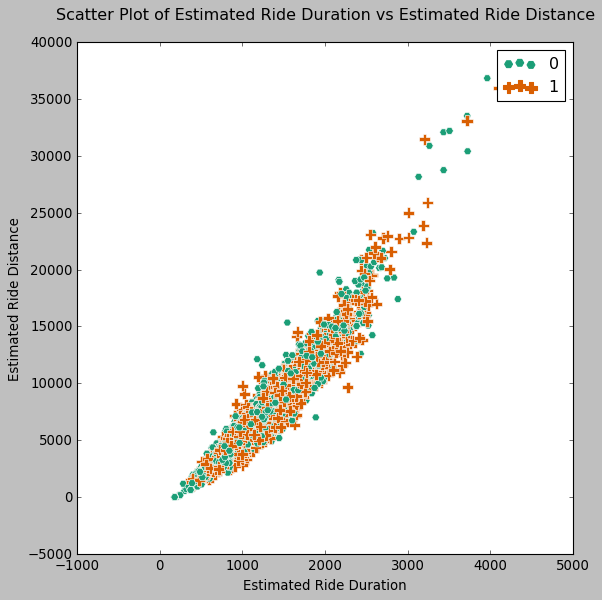

In [467]:
plt.figure(figsize=(8,8))

my_markers = {0: "H", 1: "P"}
sns.scatterplot(x="estimated_ride_duration", y="estimated_ride_distance", data=train_df, markers=my_markers, sizes=(100,50),
                hue="status", size="status", style="status", palette="Dark2")

plt.xlabel("Estimated Ride Duration")
plt.ylabel("Estimated Ride Distance")
plt.title("Scatter Plot of Estimated Ride Duration vs Estimated Ride Distance\n")
plt.legend()
plt.show()


# Histogram of Estimated Fare

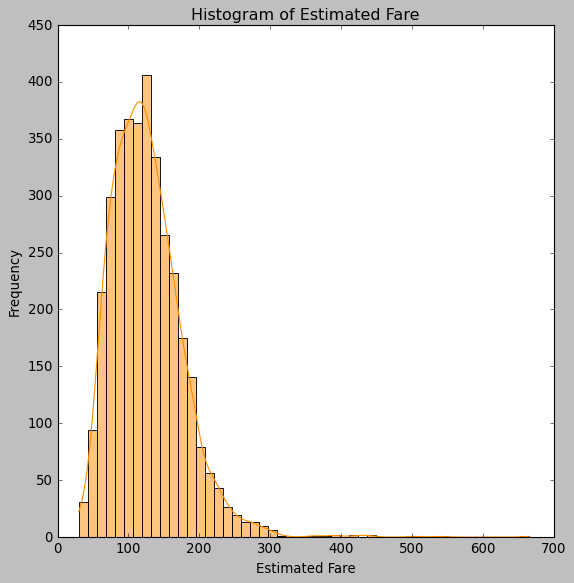

In [468]:
plt.figure(figsize=(8,8))
sns.histplot(train_df["estimated_fare"], bins=50, kde=True,color="darkorange")
plt.xlabel("Estimated Fare")
plt.ylabel("Frequency")
plt.title("Histogram of Estimated Fare")
plt.show()

# Box Plot of Estimated Ride Duration by Status

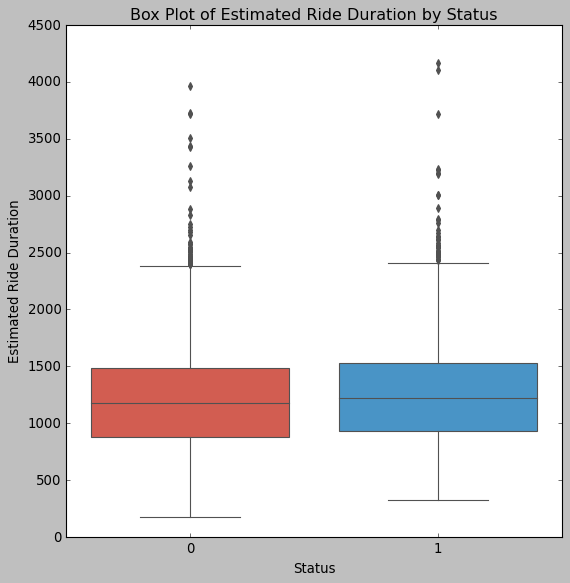

In [469]:
plt.figure(figsize=(8, 8))
my_palette = ["#E74C3C", "#3498DB"]
sns.boxplot(x="status", y="estimated_ride_duration", data=train_df,palette=my_palette)
plt.xlabel("Status")
plt.ylabel("Estimated Ride Duration")
plt.title("Box Plot of Estimated Ride Duration by Status")
plt.show()

# Box Plot of Estimated Ride Distance by Status

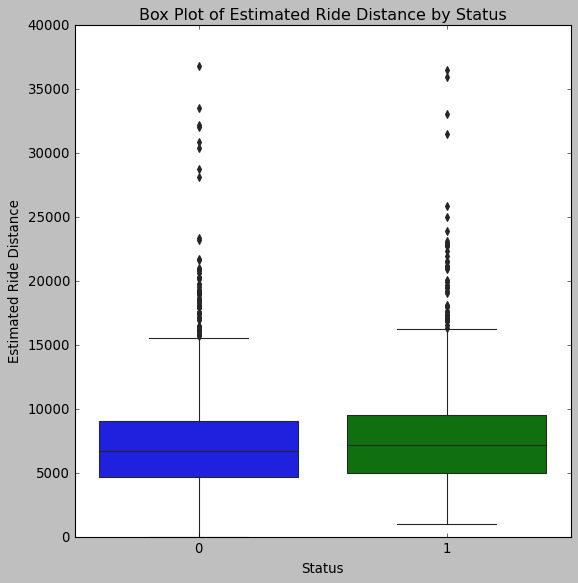

In [470]:
plt.figure(figsize=(8, 8))
my_palette = ["blue", "green"]
sns.boxplot(x="status", y="estimated_ride_distance", data=train_df, palette=my_palette)
plt.xlabel("Status")
plt.ylabel("Estimated Ride Distance")
plt.title("Box Plot of Estimated Ride Distance by Status")
plt.show()

# Line Plot of Estimated Fare vs. Rating

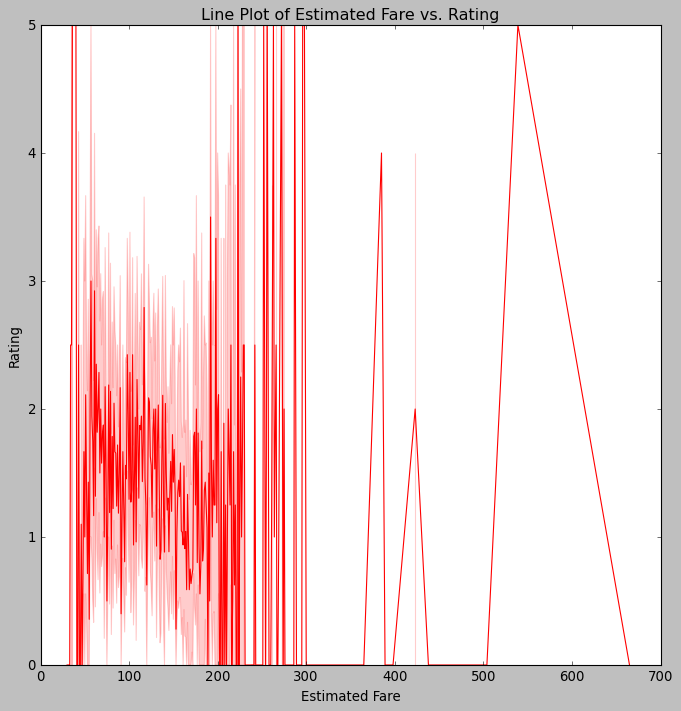

In [471]:
plt.figure(figsize=(10,10))
sns.lineplot(x="estimated_fare", y="rating", data=train_df,color="red")
plt.xlabel("Estimated Fare")
plt.ylabel("Rating")
plt.title("Line Plot of Estimated Fare vs. Rating")
plt.show()

# Line Plot of Estimated Ride Duration over Time

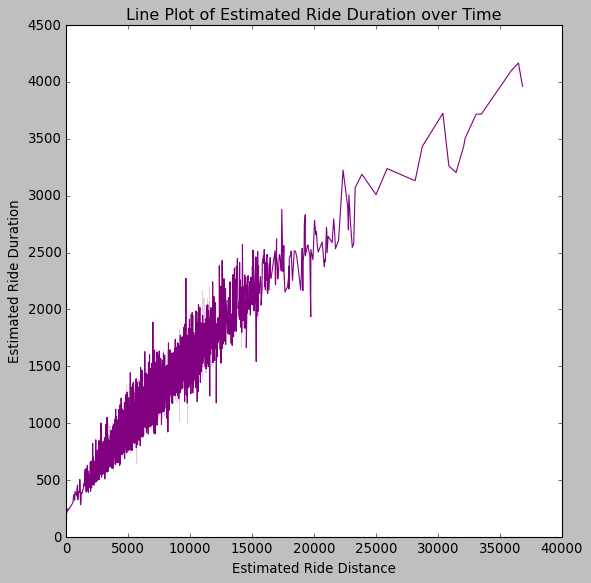

In [472]:
plt.figure(figsize=(8,8))
sns.lineplot(x="estimated_ride_distance", y="estimated_ride_duration", data=train_df,color="purple")
plt.xlabel("Estimated Ride Distance")
plt.ylabel("Estimated Ride Duration")
plt.title("Line Plot of Estimated Ride Duration over Time")
plt.show()


# Select Four Features For Train Data

In [473]:
label_data=train_df["estimated_fare"]
train_data=train_df[["estimated_ride_duration","estimated_ride_distance","status","rating"]]

In [474]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.2,random_state=42)

# Linear Regression Model

In [475]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

# Model Prediction

In [476]:
pred1=model1.predict(X_test)

# MSE

In [477]:
mse = mean_squared_error(Y_test, pred1)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 444.19395101871226


# RMSE

In [478]:
rmse = mean_squared_error(Y_test,pred1)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 444.19395101871226


# R2_Score

In [479]:
r2score = r2_score(Y_test,pred1)
print("R2 Score:", r2score)

R2 Score: 0.8504487927714512


# MAE

In [480]:
mae = mean_absolute_error(Y_test,pred1)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 17.830412376667223


# Lasso Regression

# Train With 7 Features

In [481]:
label_data2=train_df["estimated_fare"]
train_data2=train_df[["estimated_ride_duration","estimated_ride_distance","status","rating","drivers_tried","discount","canceled_by"]]

In [482]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data2,label_data2,test_size=0.2,random_state=42)

In [483]:
model2=linear_model.Lasso(alpha=0.1)
model2.fit(X_train,Y_train)


Lasso(alpha=0.1)

# Model Prediction

In [484]:
pred2=model2.predict(X_test)


# MSE2

In [485]:
mse2 = mean_squared_error(Y_test, pred2)
print("Mean Squared Error (MSE):", mse2)

Mean Squared Error (MSE): 432.4633036427737


RMSE2

In [486]:
rmse2 = mean_squared_error(Y_test,pred2)
print("Root Mean Squared Error (RMSE):", rmse2)

Root Mean Squared Error (RMSE): 432.4633036427737


# R2_Score2

In [487]:
r2score2 = r2_score(Y_test,pred2)
print("R2 Score:", r2score2)

R2 Score: 0.854398266807783


# MAE2

In [488]:
mae2 = mean_absolute_error(Y_test,pred2)
print("Mean Absolute Error (MAE):", mae2)

Mean Absolute Error (MAE): 17.46682152304678


# Now,Try Scaling and Check Model Performance

In [489]:
train_df.head()

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
0,1010,5919,1,5.0,2,0,44.0,0.0,1,89
1,2041,12440,0,0.0,9,0,0.0,703684.0,1,163
2,634,3173,1,0.0,3,0,6.0,0.0,1,58
3,1279,7961,0,0.0,4,0,0.0,7585415.0,1,112
4,1085,4242,0,0.0,8,0,0.0,1049024.0,1,72


In [490]:
scaler = MinMaxScaler()
columns_to_scale = ['estimated_ride_duration', 'estimated_ride_distance', 'rating', 'drivers_tried', 'review_requested', 'discount', 'canceled_by', 'payment_type', 'estimated_fare']
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])

In [491]:
columns_to_scale = ['estimated_ride_duration', 'estimated_ride_distance', 'rating', 'drivers_tried', 'review_requested', 'discount', 'canceled_by', 'payment_type']
test_df[columns_to_scale] = scaler.fit_transform(test_df[columns_to_scale])
test_df.head()

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type
0,0.192137,0.106843,1,1.0,0.2500,0.0,0.561644,0.000000,1.0
1,0.356312,0.244221,0,0.0,0.5000,0.0,0.000000,0.917042,0.0
2,0.275748,0.253923,0,0.0,0.1875,0.0,0.000000,0.975428,0.0
3,0.301218,0.233607,0,0.0,0.1875,0.0,0.000000,0.026536,0.0
4,0.332780,0.249909,0,0.0,0.1875,0.0,0.000000,0.493211,0.0


In [492]:
train_df.head()

,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
0,0.208229,0.160777,1,1.0,0.117647,0.0,0.500000,0.000000,0.0,0.092913
1,0.466884,0.337906,0,0.0,0.529412,0.0,0.000000,0.090020,0.0,0.209449
2,0.113899,0.086188,1,0.0,0.176471,0.0,0.068182,0.000000,0.0,0.044094
3,0.275715,0.216243,0,0.0,0.235294,0.0,0.000000,0.970381,0.0,0.129134
4,0.227045,0.115225,0,0.0,0.470588,0.0,0.000000,0.134199,0.0,0.066142


In [493]:
scale_data=train_df[['estimated_ride_duration', 'estimated_ride_distance', 'rating', 'drivers_tried', 'review_requested', 'discount', 'canceled_by', 'payment_type']]
scale_label=train_df["estimated_fare"]


In [494]:
X_train,X_test,Y_train,Y_test=train_test_split(scale_data,scale_label,test_size=0.2,random_state=42)

# Ridge Model

In [495]:
model3 = Ridge(alpha=1.0)
model3.fit(X_train,Y_train)

Ridge()

In [496]:
pred3=model3.predict(X_test)

# MSE3

In [497]:
mse3 = mean_squared_error(Y_test,pred3)

print("Mean Squared Error (MSE):", mse3)

Mean Squared Error (MSE): 0.0011744574454691022


# RMSE3

In [498]:
rmse3 = mean_squared_error(Y_test,pred3)
print("Root Mean Squared Error (RMSE):", rmse3)

Root Mean Squared Error (RMSE): 0.0011744574454691022


# MAE3

In [499]:
mae3 = mean_absolute_error(Y_test,pred3)
print("Mean Absolute Error (MAE):", mae3)

Mean Absolute Error (MAE): 0.028817487426148668


# R2 Score3

In [500]:
r2score3 = r2_score(Y_test,pred3)
print("R2 Score:", r2score3)

R2 Score: 0.8405582622380005


# Final Prediction

In [501]:
test_data=test_df[['estimated_ride_duration', 'estimated_ride_distance', 'rating', 'drivers_tried', 'review_requested', 'discount', 'canceled_by', 'payment_type']]
mymodel_predict=model3.predict(test_data)
mymodel_predict

array([0.08930783, 0.18359254, 0.17131324, ..., 0.18573169, 0.17389831,
       0.20107259])

In [502]:
x=r2_score(Y_test,pred3)
y="r2_score"
predicted_df = pd.DataFrame({'Predicted':[x] , 'ID':[y]})
predicted_df.head()

,Predicted,ID
0,0.840558,r2_score


In [503]:
predicted_df.to_csv("submission.csv",index=False)

In [504]:
test_data=pd.read_csv("/kaggle/input/kaggle-compettion/test.csv")
df1=test_data["Unnamed: 0"]

In [505]:
df = pd.DataFrame({'estimated_fare':mymodel_predict})
df.head()

,estimated_fare
0,0.089308
1,0.183593
2,0.171313
3,0.174172
4,0.183756


In [506]:
df2=df["estimated_fare"]
final_data=pd.concat([df1, df2], axis=1)
final_data.head()

,Unnamed: 0,estimated_fare
0,431,0.089308
1,2543,0.183593
2,1187,0.171313
3,747,0.174172
4,2542,0.183756


In [507]:
final_data.to_csv("final_submission.csv",index=True)